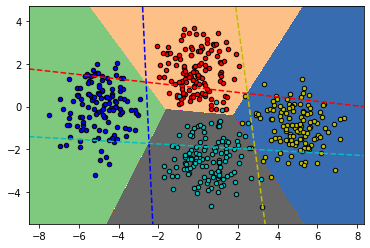

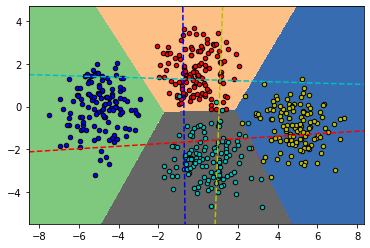

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

centers = [[-5, 0], [0, 1.5], [5, -1], [0.5,-2.4]]
X, y = make_blobs(n_samples=500, centers=centers, random_state=20)

for multi_class in ('ovr','multinomial'):
    clf = LogisticRegression(solver='sag', max_iter=500, random_state=20,
                             multi_class=multi_class).fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Accent)

    colors = "bryc"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Accent,
                    edgecolor='black', s=20)
        
    xmin, xmax = plt.xlim()
    lmin=0.0; lmax=0.0
    
    for i, color in zip(clf.classes_, colors):
        lmin= (-(xmin * clf.coef_[i, 0]) - clf.intercept_[i]) / clf.coef_[i, 1]
        lmax= (-(xmax * clf.coef_[i, 0]) - clf.intercept_[i]) / clf.coef_[i, 1]
        plt.plot([xmin, xmax], [lmin, lmax],ls="--", color=color)
        plt.ylim(-5.5,4.7)
        
plt.savefig("polytomique.png")
plt.show()